# Exploratory Data Analysis


This notebook discusses building data frames of the 2008 natality and mortality data, investigation of data missingness, and data exploration for trends, correlations, etc

In [1]:
import numpy as np
import pandas as pd
import os.path
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Build a Data Frame:
The following function builds a data frame using the attribute information (from the guide file) and the actual data. 
It has the capability of building a dictionary for multiple years if needed.

In [3]:
#sam_year = [1995,1996]
def build_Datadict(yr):
    fname = str(yr) + '/LinkCO' + str(yr)[2:4] + 'USDen.dat'
    #path_name = os.path.abspath('ReadingData/' + str(yr) + fname)
    path_name = os.path.join('ReadingData/',fname)
    print(path_name)
    infl = pd.read_table(path_name,'r',header=None)
    ofl1=pd.read_csv('%s.out.txt' % yr,'r',header=None)
    ofl2=pd.read_csv('%s.out2.txt' % yr,'r',header=None)
    ofl3=pd.read_csv('%s.colname' % yr,'r',header=None)
    a_name = 'a_{}'.format(yr) 
    a_name = {}
    for ind in range(len(ofl3.index)):
        a_name[ofl3[0][ind]]=(infl.iloc[:,0].str.slice(ofl1.iat[ind,0],ofl2.iat[ind,0]))
    df = pd.DataFrame(a_name)
    return df

yrList = [2008]
def Datadict_drive(yrList):
    d={}
    for yr in yrList:
        d['%s' % yr] = build_Datadict(yr)
    return d
dd = Datadict_drive(yrList)

ReadingData/2008/LinkCO08USDen.dat


## General Information

Let's look at the dataset to have a sense of what the data looks like.

In [4]:
data_2008 = dd['2008'] #If we have multiple years we can insert the relevant year instead of '2008'
data_2008.tail(5)

,AB_ANTI,AB_AVEN1,AB_AVEN6,AB_BINJ,AB_NICU,AB_SEIZ,AB_SURF,AGED,AGER22,AGER5,...,UOP_INDUC,UOP_TOCOL,UPREVIS,URF_CHYPER,URF_DIAB,URF_ECLAM,URF_PHYPER,WEEKDAYD,WTGAIN,WTGAIN_REC
4255183,N,N,N,N,N,N,N,,,,...,2,2,12,2,2,2,2,,00,1
4255184,N,N,N,N,N,N,N,,,,...,2,2,12,2,2,2,2,,10,1
4255185,N,N,N,N,N,N,N,,,,...,2,2,12,2,2,2,2,,10,1
4255186,N,N,N,N,N,N,N,,,,...,2,2,11,2,2,2,2,,37,6
4255187,N,N,N,N,N,N,N,,,,...,2,2,10,2,2,2,2,,50,8


Have a look at the size of the data set (records/attributes)

In [5]:
data_2008.shape

(4255188, 183)

In [6]:
attribute_list = list(data_2008.columns.str.strip()) #strip in case some of the column names have spaces around them.
print(attribute_list)

['AB_ANTI', 'AB_AVEN1', 'AB_AVEN6', 'AB_BINJ', 'AB_NICU', 'AB_SEIZ', 'AB_SURF', 'AGED', 'AGER22', 'AGER5', 'APGAR5', 'APGAR5R', 'ATTEND', 'AUTOPSY', 'BFACIL', 'BFACIL3', 'BRTHWGT', 'BWTIMP', 'BWTR14', 'BWTR4B', 'CA_ANEN', 'CA_CCHD', 'CA_CDH', 'CA_CLEFT', 'CA_CLPAL', 'CA_DISOR', 'CA_DOWN', 'CA_GAST', 'CA_HYPO', 'CA_LIMB', 'CA_MNSB', 'CA_OMPH', 'CIGS', 'CIG_1', 'CIG_2', 'CIG_3', 'CIG_REC', 'CNTOCFIPD', 'CNTRSPPD', 'CNTYRFPD', 'COMBGEST', 'DFPC_IMP', 'DISPO', 'DLLB_MM', 'DLLB_YY', 'DLMP_DD', 'DLMP_MM', 'DLMP_YY', 'DMETH_REC', 'DOB_MM', 'DOB_WK', 'DOB_YY', 'DOD_MM', 'DPLURAL', 'DRCNTY', 'DTHYR', 'EANUM', 'ENTITY', 'ESTGEST', 'FAGECOMB', 'FAGEREC11', 'FAGERPT_FLG', 'FBRACE', 'FILLER', 'FLGND', 'FLG_REV', 'FRACEHISP', 'FRACEREC', 'GESTREC10', 'GESTREC3', 'GEST_IMP', 'HOSPD', 'IMP_PLUR', 'IMP_SEX', 'LATEREC', 'LBO', 'LD_ANES', 'LD_ANTI', 'LD_AUGM', 'LD_CHOR', 'LD_FINT', 'LD_INDL', 'LD_MECS', 'LD_NVPR', 'LD_STER', 'MAGER', 'MAGER14', 'MAGER9', 'MAGE_IMPFLG', 'MAGE_REPFLG', 'MANNER', 'MAR', 'MA

### Range of Data Values

Now let's look at the range of data values for each attribute. To make it easy, build a dictionary of summary of all 
values in the data. 

In [7]:
values_dict = {}
for var in list(data_2008.columns):
    values_dict[var] = data_2008['%s' % var].value_counts().sort_index().to_dict()

Have a look at the first five attributes and their range of values

In [10]:
first5 = {k: values_dict[k] for k in sorted(values_dict.keys())[:5]}
first5

{'AB_ANTI': {' ': 1493825, 'N': 2684457, 'U': 29304, 'Y': 47602},
 'AB_AVEN1': {' ': 1493781, 'N': 2620105, 'U': 29304, 'Y': 111998},
 'AB_AVEN6': {' ': 1493803, 'N': 2707933, 'U': 29304, 'Y': 24148},
 'AB_BINJ': {' ': 1493847, 'N': 2730119, 'U': 29304, 'Y': 1918},
 'AB_NICU': {' ': 1493803, 'N': 2549202, 'U': 29304, 'Y': 182879}}

### Range of Valid Data Values

We have built a dictionary of attributes and their actual values. But we need to know the valid values before starting any analysis. Build a dictionary of valid values from the guide document (called tabula_2008). The following function builds all the attributes and possible valid values.

Let's see what the tabula file looks like

In [11]:
import codecs
tab_08 = codecs.open('tabula_2008','r','utf-8')
for i in range(25):
    print(tab_08.readline())

1-6	6	FILLER	Filler		

""					

7	1	REVISION	Revision	U,R	R State used the 2003 version of the US Standard Birth

""					U,R U State used the 1989 version of the US Standard Birth

""					

8	1	FILLER	Filler		

""					

9	1	LATEREC	Late Record Flag	U,R	0 Not late record

""					1 Late record

""					

10-14	5	SEQNUM	Infant Death Number		00001-nnnnn This number uniquely identifies the same infant	

""			00001-nnnnn In the numerator and denominator-plus files.		

""					

15-18	4	DOB_YY	Birth Year	U,R	2006 2006

""					2007 2007

""					

19-20	2	DOB_MM	Birth Month	U,R	01 January

""					02 February

""					03 March

""					04 April

""					05 May

""					06 June

""					07 July

""					08 August

""					09 September



Lets build a dictionary of the valid values from the guide document above

In [25]:
import codecs
import re
def build_ValidValuesDict():
    cols_in = codecs.open('tabula_2008','r','utf-8')
    file_out=open('format_out','w+')
    mydict = {}
    last_att = None
    num = []
    count = 0
    for line in cols_in:
        if (len(line.split()) > 2):
            if line.split()[0][0].isdigit():
                if (not line.split()[2].isdigit()):
                    last_att = (line.split()[2])
                    #print(last_att)
                try:
                    a = line.split().index(r'R') 
                    num.append(line.split()[a+1].strip())
                except:
                    pass
                try:
                    a = line.split().index(r'U') 
                    num.append(line.split()[a+1].strip())
                except:
                    pass
                try:
                    a = line.split().index(r'U,R') 
                    num.append(line.split()[a+1].strip())
                except:
                    pass   
                try:
                    a = line.split().index(r'R**') 
                    num.append(line.split()[a+1].strip())
                except:
                    pass
                try:
                    a = line.split().index(r'Unrevised') 
                    num.append(line.split()[a+1].strip())
                except:
                    pass
                
            elif (not line.split()[0][0].isdigit()):   
                if (line.split()[1].isdigit() or "Blank" in line.split()[1] or "Y" is line.split()[1]) \
                or "N" is line.split()[1] or "U" is line.split()[1] or "F" is line.split()[1]:
                    
                    if (len(line.split()) > 3):
                        if not line.split()[3].isupper():
                            num.append(line.split()[1].strip())
                        if line.split()[3].isupper():
                            last_att = (line.split()[3])
                            num.extend(['Y','N','U','Blank'])
                            mydict.update({last_att:num})
                            num = []
                    else:
                        num.append(line.split()[1].strip())
        else:
            count += 1
            mydict.update({last_att:num})
            num = []
    return mydict

In [26]:
valid_values=build_ValidValuesDict()
#build_ValidValuesDict()
#list(valid_values.keys())

Now we have built a dictionary of valid values and actual values, lets take an example and compare them

In [27]:
valid_values['UMEDUC']

['00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '99',
 'Blank']

In [28]:
values_dict['UMEDUC']

{'  ': 2761429,
 '00': 2964,
 '01': 1124,
 '02': 2196,
 '03': 3509,
 '04': 3100,
 '05': 3543,
 '06': 24884,
 '07': 6017,
 '08': 22057,
 '09': 54689,
 '10': 58166,
 '11': 83307,
 '12': 443153,
 '13': 109097,
 '14': 165009,
 '15': 53167,
 '16': 262479,
 '17': 181262,
 '2 ': 1,
 '3 ': 2,
 '4 ': 2,
 '5 ': 6,
 '99': 14025}

Create a dictionary that stores the difference between the actual values and valid values to come up with a list of invalid values

In [29]:
attSet = {}
for k in attribute_list:
    att_name = '%s' % k
    attSet.update({k:(set((data_2008['%s' % k].values.all())) - set(valid_values['%s' % k]))})

A comparison of the values will give us information about missing (invalid) data. This leads us to our next big topic, 
data missingness.

## Data Missingness

A preliminary data exploration shows missing data icluding empty strings, unknown values, and invalid values. The amount and type of missing data from data exploration is summarized in a file called 'exploration_2008.txt'. Following is a series of bar chart of all the attributes.

In [30]:
data_completeness = pd.read_csv('exploration_2008.txt',delim_whitespace=True)
data_completeness.head()

,Column,Type,Invalid,Empty,EmptyWithMean,Not_Stated,unknown,Missing_Data,NotApplicable,Total,Revision
0,DOB_YY,nominal,66,33,0,0,0,99,0,4255188,UR
1,DOB_MM,nominal,0,99,0,0,0,99,0,4255188,UR
2,DOB_WK,nominal,0,99,0,0,0,99,0,4255188,UR
3,OSTATE,nominal,0,4255188,0,0,0,4255188,0,4255188,UR
4,OCNTYFIPS,nominal,55,4255133,0,0,0,4255188,0,4255188,UR


Plot bar chart to see the ratio of valid versus missing data. Group by similar attributes for easy viewing
check_missingData(r1,r2) where r1, r2 are for attributes related to infant birth place, time, facility
- (0,9) for attributes related to infant birth place, time, facility
- (10,31) for attributes related to mother's age, race, hispanic origin, marital status, and education
- (31,40) for attributes related to father's age, race, and hispanic origin
- (40,44) for attributes related to live birth history
- (44,54) for attributes related to prenatal care visits and weight gain history
- (54,61) for attributes related to cigarete and tobacco use
- (61,74) for attributes related to risk factors such as diabetes, hypertenstion, previous c-deiliveries
- (74,80) for attributes related to obstetric procedures
- (80,95) for attributes related to onset and characteristics of labor, and method of delivery
- (95,110) for attributes related to method of delivery
- (110,116) for attributes related to apgar score, plurality, and sex
- (116,129) for attributes related to birthweight and gestation
- (129,136) for attributes related to abnormal conditions of newborn including ventilation, admission to NICU, seizure and birth injury
- (136,155) for attributes related to congenital conditions of newborn including Anencephaly, Downs Syndrome
- (136,155) for attributes related to congenital conditions of newborn including Anencephaly, Downs Syndrome
-  (155,164) infant cause of death, deposition, Autopsy

In [31]:
data_completeness = pd.read_csv('exploration_2008.txt',delim_whitespace=True)
from matplotlib.font_manager import FontProperties
def check_missingData(r1,r2):
    attributes_info=data_completeness[['Total','Missing_Data']][r1:r2]
    attributes_info['Valid_Data'] = attributes_info.Total - attributes_info.Missing_Data
    attributes_info_toplot = attributes_info[['Valid_Data','Missing_Data']]
    normed_toplot = attributes_info_toplot.div(attributes_info_toplot.sum(1), axis=0)
    ax=normed_toplot.plot(kind='barh', stacked=True)
    ax.set_yticklabels(data_completeness.Column[r1:r2])
    ax.set_xlabel('percentage')
    ax.set_title('Missing vs Valid data')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          ncol=3, fancybox=True, shadow=True)
    plt.show()

   

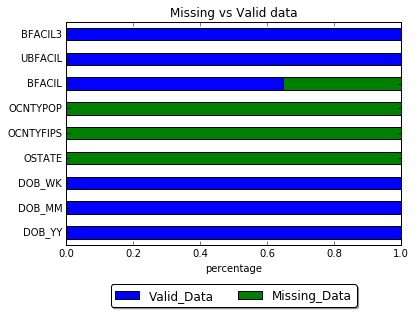

In [32]:
#Missing vs valid data for attributes related to infant birth place, time, facility
check_missingData(0,9)

# Look if reason behind missing data is systemic (not random) 

The attributes OCNTYPOP, OCNTYFIPS,OSTATE do not have valid data as the CDC excluded those attributes in the 
publicly available raw data.The attribute BFACIL (Birth of place) has missing values because it was added in the 2003
revised version of the US Standard Certificate of Live Birth and Certificate of Death. Many states still used the 1989
US Standard Certificate of Live Birth and Certificate of Death (UBFACIL). BFACIL has additional options of home (intended), home (unintended), and home (unknown).

In [33]:
data_2008['OCNTYPOP'].head()

0     
1     
2     
3     
4     
Name: OCNTYPOP, dtype: object

Write a function that takes a list of attributes with 100% missing data and removes them from the data set

In [23]:
def rem_zeroDataAtt(my_df,mylist):
    for ZeroDataAtt in mylist:
        try:
            my_df = my_df.drop(['%s' % ZeroDataAtt],1)
        except:
                pass
    return my_df

In [24]:
mylist = ['OCNTYPOP', 'OCNTYFIPS','OSTATE']
new_aa = rem_zeroDataAtt(data_2008,mylist)

Check the dimension of the data after removing the three columns

In [25]:
new_aa.shape

(4255188, 180)

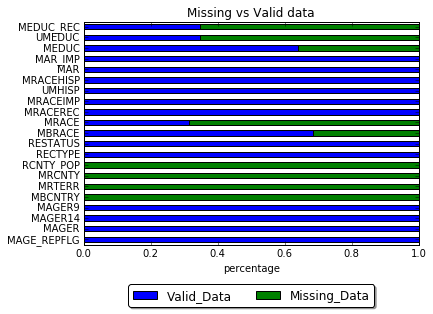

In [26]:
#Missing vs valid data for attributes related to mother's age, race, hispanic origin, marital status, and education
check_missingData(10,31)

The attributes RCNTY_POP (Mother's county of residence population), MRCNTY (Mother's county of residence),MRTERR (Mother's residence), and MBCNTRY (Mother's birth country) do not have valid data as the CDC excluded those attributes in the publicly available raw data. Remove these columns from the dataframe.

In [27]:
mylist = ['RCNTY_POP', 'MRCNTY','MBCNTRY', 'MRTERR']
new_aa = rem_zeroDataAtt(new_aa,mylist)

The attributes MEDUC_REC, UMEDUC, MEDUC, MRACE, MBRACE have a substantial amount of data missing. Look if there is any 
pattern. Those source of the data comes from states that use unrevised (U), revised (R), or combination of both (UR). 
Look if that could be the reason for the missing data.

Add a column of "Revision" to 'exploration_2008.txt' and load it

In [28]:
data_completeness_new = pd.read_csv('exploration_2008.txt',delim_whitespace=True)
data_completeness_new.head()

,Column,Type,Invalid,Empty,EmptyWithMean,Not_Stated,unknown,Missing_Data,NotApplicable,Total,Revision
0,DOB_YY,nominal,66,33,0,0,0,99,0,4255188,UR
1,DOB_MM,nominal,0,99,0,0,0,99,0,4255188,UR
2,DOB_WK,nominal,0,99,0,0,0,99,0,4255188,UR
3,OSTATE,nominal,0,4255188,0,0,0,4255188,0,4255188,UR
4,OCNTYFIPS,nominal,55,4255133,0,0,0,4255188,0,4255188,UR


In [29]:
data_completeness = data_completeness_new[data_completeness_new.Revision=='UR']
data_completeness.shape
#check_missingData(1,25)

(72, 11)

In [30]:

#data_completeness = data_completeness_new.drop(data_completeness_new.index[['OCNTYPOP', 'OCNTYFIPS','OSTATE']])
data_completeness = data_completeness.set_index(['Column'])
data_completeness = data_completeness.loc[~ data_completeness.index.isin(['OCNTYPOP', 'OCNTYFIPS','OSTATE','RCNTY_POP', 'MRCNTY','MBCNTRY', 'MRTERR'])]
data_completeness = data_completeness.reset_index()
data_completeness.shape

(66, 11)

Plot attributes which are in both the revised and unrevised version of the live birth certificate

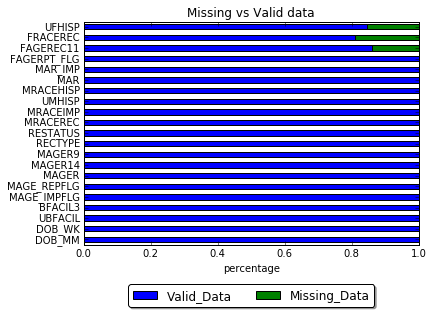

In [31]:
check_missingData(1,22)

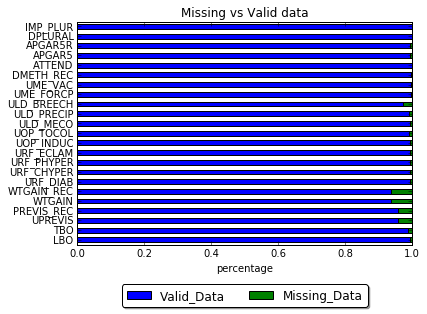

In [32]:
check_missingData(23,46)

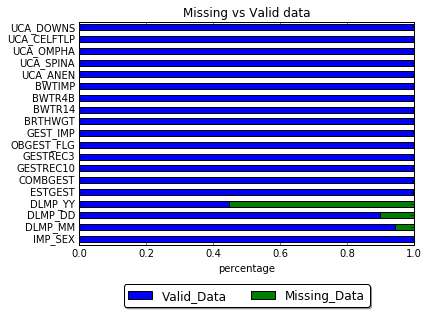

In [33]:
check_missingData(47,66)

The plots show, attributes that appear in both the revised and unrevised certificate (revision code UR), have near complete data with little missing values.

Now, let's look at the attributes which appear in the unrevised certificate version only

In [34]:
data_completeness = data_completeness_new[data_completeness_new.Revision=='U']
data_completeness.shape

(16, 11)

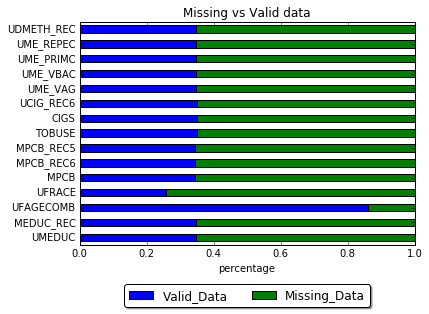

In [35]:
#Missing vs valid data for attributes related to father's age, race, and hispanic origin
check_missingData(1,16)

The plots show more than 60% of data is missing for attributes that appear in the unrevised version only

Now, lets look at the attributes that appear in the revised verstion (Revision R) only

In [36]:
data_completeness = data_completeness_new[data_completeness_new.Revision=='R']
data_completeness.shape

(65, 11)

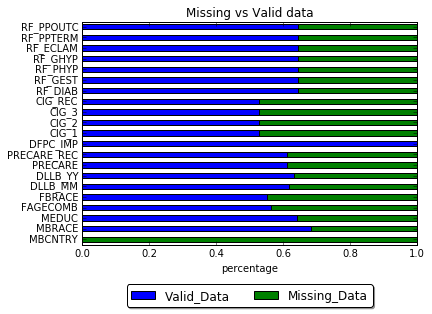

In [37]:
#Missing vs valid data for attributes related to live birth history
check_missingData(1,22)

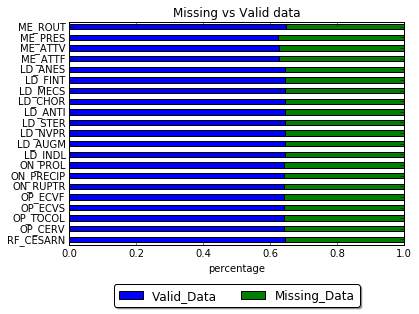

In [38]:
#Missing vs valid data for attributes related to prenatal care visits and weight gain history
check_missingData(23,44)

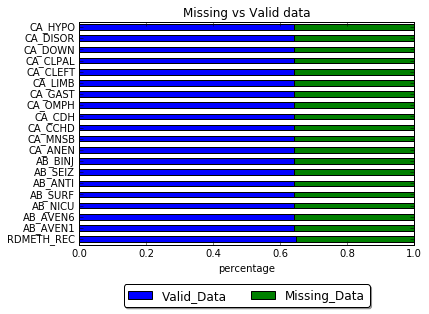

In [39]:
#Missing vs valid data for attributes related to cigarete and tobacco use
check_missingData(45,65)

The plots show more than 30% of data is missing for most of the attributes that appear in the revised version

In [40]:
Unrevised_list =list(data_completeness_new[data_completeness_new.Revision=='U'].Column)
#Unrevised_list
#mylist = ['RCNTY_POP', 'MRCNTY','MBCNTRY', 'MRTERR']
#new_aa = rem_zeroDataAtt(new_aa,mylist)

In [41]:
new_aa.shape

(4255188, 176)

In [42]:
new_aa = rem_zeroDataAtt(new_aa,Unrevised_list)

In [43]:
new_aa.shape

(4255188, 160)

Exclude rows which do not contain the revised attributes

In [44]:
final_2008 = new_aa[new_aa['FLG_REV'] == '1']

In [45]:
final_2008.shape

(2748339, 160)

Save the final data set (which only needs minor cleaning) to pickle data. From now on, just work with this dataset instead of loading the whole dataset which requires a lot of time and memory.

In [ ]:
final_2008.to_pickle('Data_forAnalysis')

In [3]:
final_2008 = pd.read_pickle('Data_forAnalysis')

Now, we have an almost complete data set with few missing values; lets replace missing data with appropriate values

Year of Birth should be 2008. The data contains 62 invalid values (like 0807,0810). Replace these values with 2008 as the data deals with 2008 natality only

In [4]:
values_dict = {}
for var in list(final_2008.columns):
    values_dict[var] = final_2008['%s' % var].value_counts().sort_index().to_dict()

In [5]:
values_dict['DOB_MM']

{'  ': 62,
 '01': 230415,
 '02': 218582,
 '03': 226442,
 '04': 224244,
 '05': 229701,
 '06': 224877,
 '07': 243002,
 '08': 241088,
 '09': 238115,
 '10': 231819,
 '11': 210490,
 '12': 229502}

In [6]:
final_2008.loc[final_2008['DOB_YY'] != '2008','DOB_YY'] = '2008'

In [7]:
final_2008[final_2008['DOB_YY'] == '2008'].shape

(2748339, 160)

In [8]:
final_2008.loc[final_2008['DOB_WK'] == ' ','DOB_WK'] = np.NaN

In [9]:
final_2008['DOB_WK'] = final_2008['DOB_WK'].fillna(method = 'backfill')

In [10]:
cols = ['DOB_MM','DOB_WK']
final_2008[cols] = final_2008[cols].replace('  ',np.NaN)
final_2008[cols] = final_2008[cols].fillna(method = 'backfill')
#final_2008['BFACIL'].fillna('1')

For BFACIL, replace empty strings with the maximum occuring value ('1')

In [11]:

cols = ['BFACIL','UBFACIL','BFACIL3']
final_2008[cols] = final_2008[cols].replace(' ',np.NaN)
final_2008[cols] = final_2008[cols].fillna('1')

### Natality vs infant mortality

The file has a flag which identifies an infant death (FLGND = 1). Lets look at the ratio of infant fatality

In [12]:
final_2008['FLGND'].value_counts()

2    2731020
1      17257
          62
Name: FLGND, dtype: int64

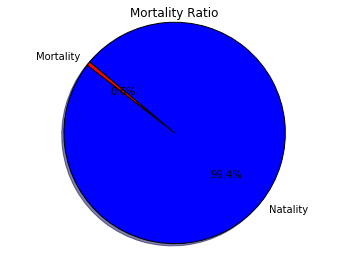

In [13]:
labels = 'Mortality', 'Natality'
sizes = [17257, 2731020 ]
colors = ['red','blue']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Mortality Ratio')
plt.show()

# Check Correlation between attributes and infant mortality

Apgar score

In [14]:
apgar = final_2008[["FLGND","APGAR5"]]

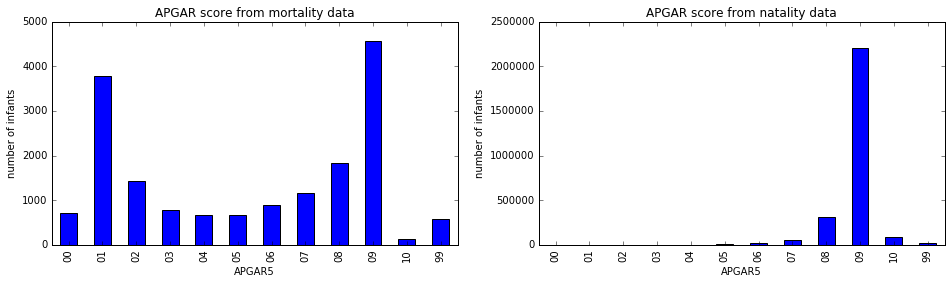

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
apgar[apgar.FLGND == '1'][['FLGND','APGAR5']].groupby(['APGAR5']).count().plot(kind='bar',ax= ax1,figsize=(16,4),title ="APGAR score from mortality data")
apgar[apgar.FLGND == '2'][['FLGND','APGAR5']].groupby(['APGAR5']).count().plot(kind='bar',ax = ax2,figsize=(16,4),title ="APGAR score from natality data")
ax1.set_ylabel('number of infants')
ax2.set_ylabel('number of infants')
ax1.legend_.remove()
ax2.legend_.remove()

APGAR score is a measure of the physical condition of a newborn infant. The APGAR score from the mortality data shows a bimodal distribution with maximum counts at apgar score of 01 and 09. Normally, we do not expect an infant of high APGAR score to die. Lets see what were the three major causes of death of infants with high APGAR score.

In [16]:
final_2008[(final_2008['APGAR5'] == '09') & (final_2008['FLGND'] == '1')]['UC0D'].value_counts().head(3)

R95     1020
R99      507
W75      367
Name: UC0D, dtype: int64

The three major cause of deaths for infants of high APGAR score are R95 (sudden infant death syndrom), R99 (other symptoms, signs, and abnormal clinical and laboratory findings, not classified elsewhere), and W75 (accidental suffocation or strangulation in bed)

Abnormal conditions of new born

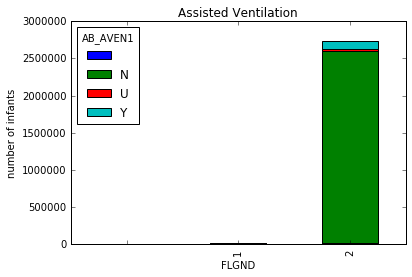

In [17]:
ax=final_2008[["FLGND","AB_AVEN1"]].groupby(["AB_AVEN1","FLGND"]).size().unstack().unstack().unstack().plot(kind='bar', stacked=True,title="Assisted Ventilation")
ax.set_ylabel("number of infants")

The number of infant deaths is only a small portion of the infant birth and it is difficult to see the bar chart. It is better to use different scales for the mortality and natality data

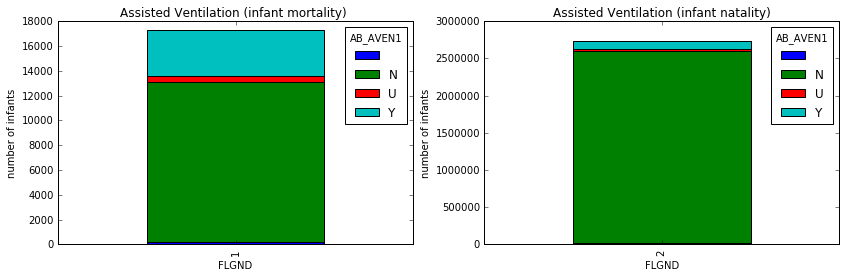

In [18]:
AB_AVEN1=final_2008[['AB_AVEN1','FLGND']]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
AB_AVEN1[AB_AVEN1.FLGND == '1'][['FLGND','AB_AVEN1']].groupby(['AB_AVEN1','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax1,figsize=(14,4),stacked=True,title="Assisted Ventilation (infant mortality) ")
AB_AVEN1[AB_AVEN1.FLGND == '2'][['FLGND','AB_AVEN1']].groupby(['AB_AVEN1','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax2,figsize=(14,4),stacked=True,title="Assisted Ventilation (infant natality)")
ax1.set_ylabel('number of infants')
ax2.set_ylabel('number of infants')

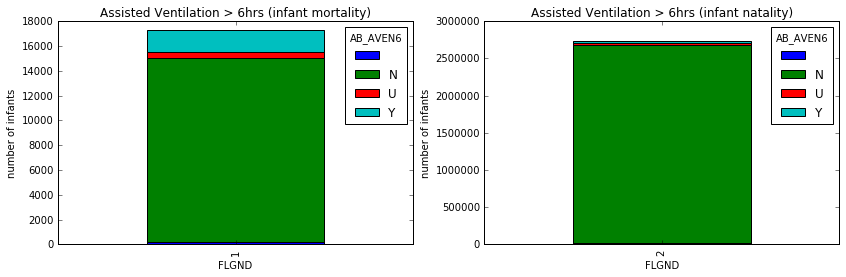

In [19]:
AB_AVEN6=final_2008[['AB_AVEN6','FLGND']]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
AB_AVEN6[AB_AVEN6.FLGND == '1'][['FLGND','AB_AVEN6']].groupby(['AB_AVEN6','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax1,figsize=(14,4),stacked=True,title="Assisted Ventilation > 6hrs (infant mortality)")
AB_AVEN6[AB_AVEN6.FLGND == '2'][['FLGND','AB_AVEN6']].groupby(['AB_AVEN6','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax2,figsize=(14,4),stacked=True,title="Assisted Ventilation > 6hrs (infant natality)")
ax1.set_ylabel('number of infants')
ax2.set_ylabel('number of infants')

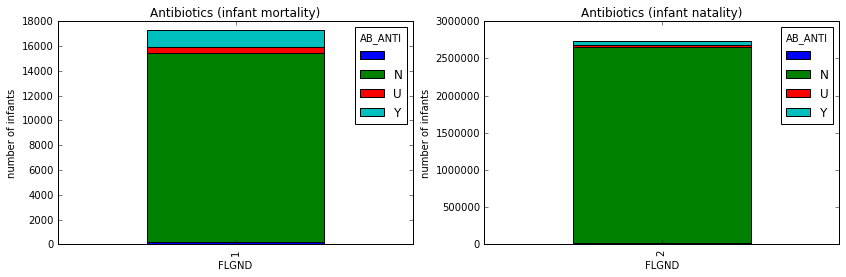

In [20]:
AB_ANTI=final_2008[['AB_ANTI','FLGND']]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
AB_ANTI[AB_ANTI.FLGND == '1'][['FLGND','AB_ANTI']].groupby(['AB_ANTI','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax1,figsize=(14,4),stacked=True,title="Antibiotics (infant mortality)")
AB_ANTI[AB_ANTI.FLGND == '2'][['FLGND','AB_ANTI']].groupby(['AB_ANTI','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax2,figsize=(14,4),stacked=True,title="Antibiotics (infant natality)")
ax1.set_ylabel('number of infants')
ax2.set_ylabel('number of infants')

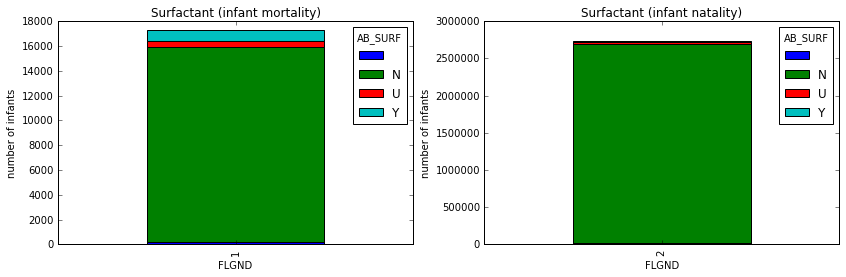

In [21]:
AB_SURF=final_2008[['AB_SURF','FLGND']]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
AB_SURF[AB_SURF.FLGND == '1'][['FLGND','AB_SURF']].groupby(['AB_SURF','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax1,figsize=(14,4),stacked=True,title="Surfactant (infant mortality)")
AB_SURF[AB_SURF.FLGND == '2'][['FLGND','AB_SURF']].groupby(['AB_SURF','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax2,figsize=(14,4),stacked=True,title="Surfactant (infant natality)")
ax1.set_ylabel('number of infants')
ax2.set_ylabel('number of infants')

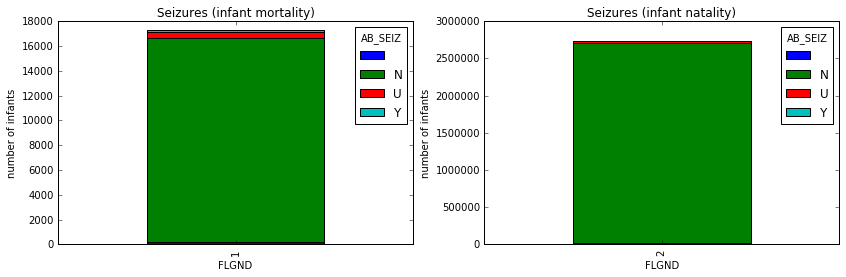

In [22]:
AB_SEIZ=final_2008[['AB_SEIZ','FLGND']]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
AB_SEIZ[AB_SURF.FLGND == '1'][['FLGND','AB_SEIZ']].groupby(['AB_SEIZ','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax1,figsize=(14,4),stacked=True,title="Seizures (infant mortality)")
AB_SEIZ[AB_SURF.FLGND == '2'][['FLGND','AB_SEIZ']].groupby(['AB_SEIZ','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax2,figsize=(14,4),stacked=True,title="Seizures (infant natality)")
ax1.set_ylabel('number of infants')
ax2.set_ylabel('number of infants')

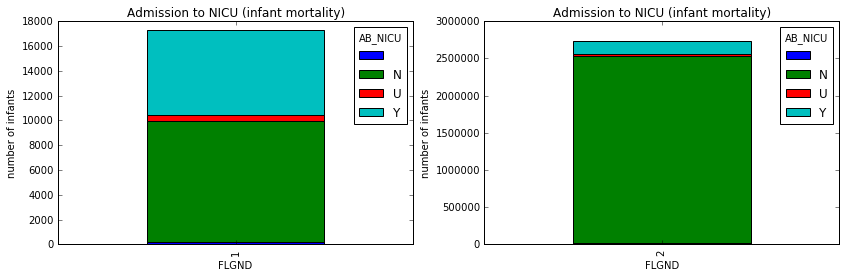

In [23]:
AB_NICU=final_2008[['AB_NICU','FLGND']]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
AB_NICU[AB_NICU.FLGND == '1'][['FLGND','AB_NICU']].groupby(['AB_NICU','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax1,figsize=(14,4),stacked=True,title="Admission to NICU (infant mortality)")
AB_NICU[AB_NICU.FLGND == '2'][['FLGND','AB_NICU']].groupby(['AB_NICU','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax2,figsize=(14,4),stacked=True,title="Admission to NICU (infant mortality)")
ax1.set_ylabel('number of infants')
ax2.set_ylabel('number of infants')

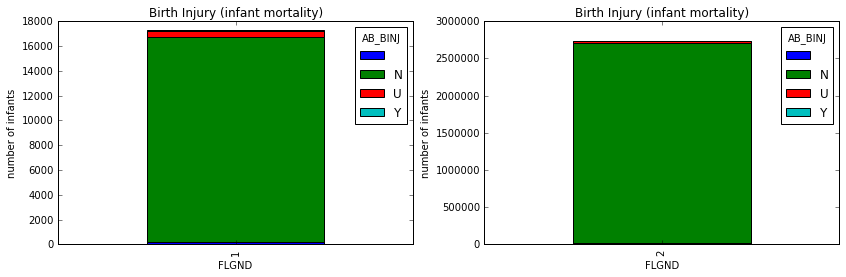

In [24]:
AB_BINJ=final_2008[['AB_BINJ','FLGND']]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
AB_BINJ[AB_BINJ.FLGND == '1'][['FLGND','AB_BINJ']].groupby(['AB_BINJ','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax1,figsize=(14,4),stacked=True,title="Birth Injury (infant mortality)")
AB_BINJ[AB_BINJ.FLGND == '2'][['FLGND','AB_BINJ']].groupby(['AB_BINJ','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax2,figsize=(14,4),stacked=True,title="Birth Injury (infant mortality)")
ax1.set_ylabel('number of infants')
ax2.set_ylabel('number of infants')

The bar charts above show a significant amount of infant deaths in cases that reported admission to NICU and administration of assisted ventilation

Birth Weight

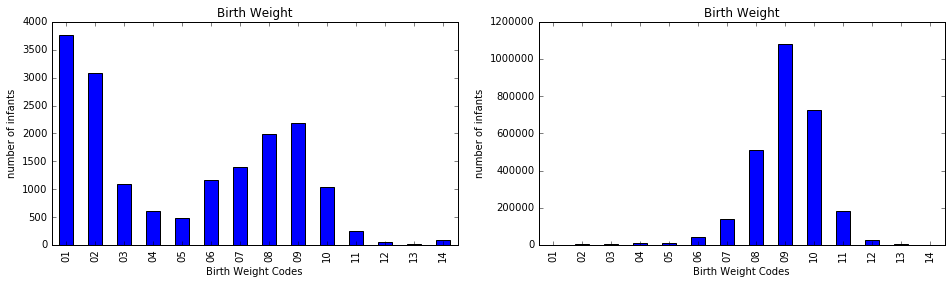

In [25]:
BWTR14 = final_2008[["FLGND","BWTR14"]]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
BWTR14[BWTR14.FLGND == '1'][['FLGND','BWTR14']].groupby(['BWTR14']).count().plot(kind='bar',ax= ax1,figsize=(16,4), title="Birth Weight")
BWTR14[BWTR14.FLGND == '2'][['FLGND','BWTR14']].groupby(['BWTR14']).count().plot(kind='bar',ax = ax2,figsize=(16,4), title="Birth Weight")
ax1.set_xlabel('Birth Weight Codes')
ax2.set_xlabel('Birth Weight Codes')
ax1.set_ylabel('number of infants')
ax2.set_ylabel('number of infants')
ax1.legend_.remove()
ax2.legend_.remove()

The birth weight bar chart from the infant mortality data shows higher number of infants that weighed less that 750 grams (bins 01 and 02).

Gestation

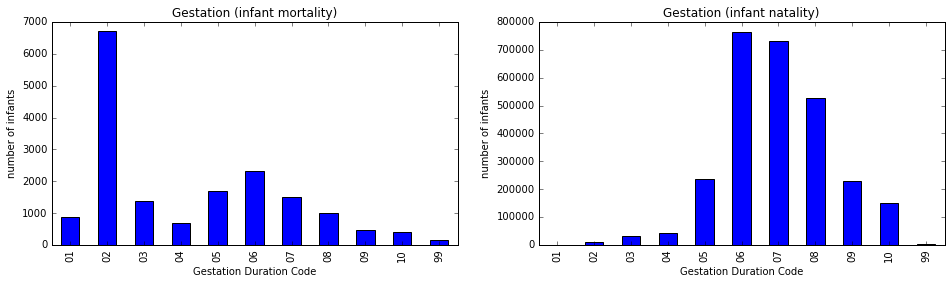

In [26]:
GESTREC10 = final_2008[["FLGND","GESTREC10"]]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
GESTREC10[GESTREC10.FLGND == '1'][['FLGND','GESTREC10']].groupby(['GESTREC10']).count().plot(kind='bar',ax= ax1,figsize=(16,4),title="Gestation (infant mortality)")
GESTREC10[GESTREC10.FLGND == '2'][['FLGND','GESTREC10']].groupby(['GESTREC10']).count().plot(kind='bar',ax = ax2,figsize=(16,4),title="Gestation (infant natality)")
ax1.set_xlabel("Gestation Duration Code")
ax2.set_xlabel("Gestation Duration Code")
ax1.set_ylabel("number of infants")
ax2.set_ylabel("number of infants")
ax1.legend_.remove()
ax2.legend_.remove()

The gestation bar chart from the infant mortality data shows higher number of infants with gestation period of less than 27 weeks (bin 02).

Pre-pregnancy diabetes

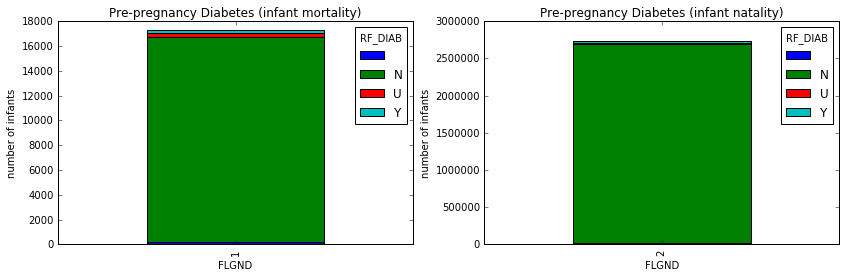

In [27]:
RF_DIAB=final_2008[['RF_DIAB','FLGND']]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
RF_DIAB[RF_DIAB.FLGND == '1'][['FLGND','RF_DIAB']].groupby(['RF_DIAB','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax1,figsize=(14,4),stacked=True,title="Pre-pregnancy Diabetes (infant mortality)")
RF_DIAB[RF_DIAB.FLGND == '2'][['FLGND','RF_DIAB']].groupby(['RF_DIAB','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax2,figsize=(14,4),stacked=True,title="Pre-pregnancy Diabetes (infant natality)")
ax1.set_ylabel("number of infants")
ax2.set_ylabel("number of infants")

Gestational diabetes

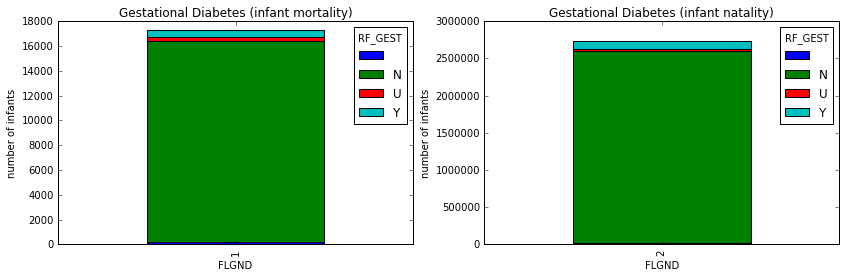

In [28]:
RF_GEST=final_2008[['RF_GEST','FLGND']]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
RF_GEST[RF_GEST.FLGND == '1'][['FLGND','RF_GEST']].groupby(['RF_GEST','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax1,figsize=(14,4),stacked=True,title="Gestational Diabetes (infant mortality)")
RF_GEST[RF_GEST.FLGND == '2'][['FLGND','RF_GEST']].groupby(['RF_GEST','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax2,figsize=(14,4),stacked=True,title="Gestational Diabetes (infant natality)")
ax1.set_ylabel("number of infants")
ax2.set_ylabel("number of infants")

Pre-pregnancy hypertension

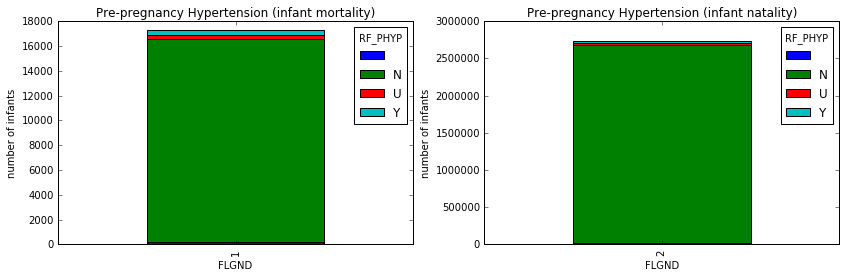

In [29]:
RF_PHYP=final_2008[['RF_PHYP','FLGND']]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
RF_PHYP[RF_PHYP.FLGND == '1'][['FLGND','RF_PHYP']].groupby(['RF_PHYP','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax1,figsize=(14,4),stacked=True,title="Pre-pregnancy Hypertension (infant mortality)")
RF_PHYP[RF_PHYP.FLGND == '2'][['FLGND','RF_PHYP']].groupby(['RF_PHYP','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax2,figsize=(14,4),stacked=True,title="Pre-pregnancy Hypertension (infant natality)")
ax1.set_ylabel("number of infants")
ax2.set_ylabel("number of infants")

Gestational hypertension

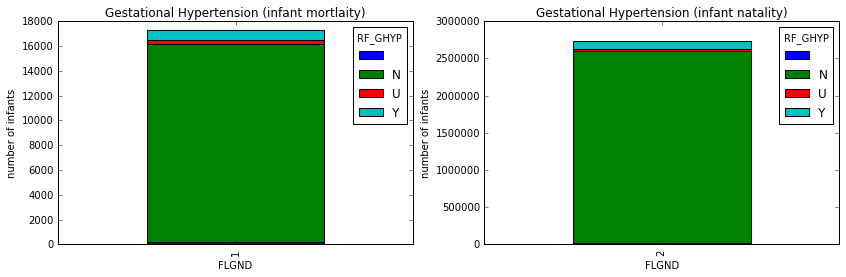

In [30]:
RF_GHYP=final_2008[['RF_GHYP','FLGND']]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
RF_GHYP[RF_GHYP.FLGND == '1'][['FLGND','RF_GHYP']].groupby(['RF_GHYP','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax1,figsize=(14,4),stacked=True,title="Gestational Hypertension (infant mortlaity)")
RF_GHYP[RF_GHYP.FLGND == '2'][['FLGND','RF_GHYP']].groupby(['RF_GHYP','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax2,figsize=(14,4),stacked=True,title="Gestational Hypertension (infant natality)")
ax1.set_ylabel("number of infants")
ax2.set_ylabel("number of infants")

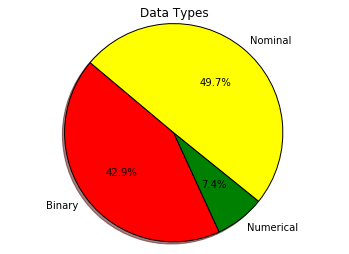

In [19]:
 # Data to plot
labels = 'Binary', 'Numerical', 'Nominal'
sizes = [70, 12, 81]
colors = ['red','green', 'yellow']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Data Types') 
plt.axis('equal')
plt.show()